In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn import metrics

In [2]:
data = pd.read_csv('Datas/DataTreinamentoDevAcademy/data_2__.csv')
data = data.drop(['index'], axis=1)
#data_test = pd.read_csv('Datas/DataTreinamentoDevAcademy/data_1__test.csv', date_parser = 'data')
data.head()

,data,valor
0,2014-07-18,1.50
1,2014-08-05,83.20
2,2014-08-08,22.50
3,2014-08-11,15.91
4,2014-08-12,0.44


In [3]:
len(data)

1542

In [4]:
data.tail()

,data,valor
1537,2018-10-27,19315.50
1538,2018-10-28,12903.71
1539,2018-10-29,11071.90
1540,2018-10-30,11205.80
1541,2018-10-31,12025.80


In [5]:
data['data'] = data['data'].astype('datetime64[ns]')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    1542 non-null   datetime64[ns]
 1   valor   1542 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.2 KB


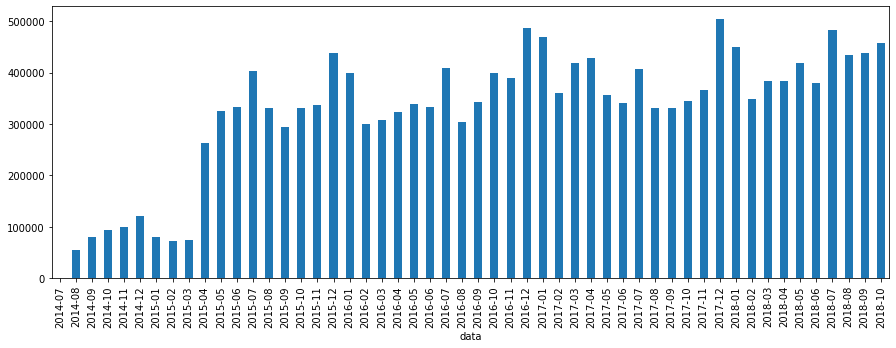

In [6]:
data['valor'].groupby(data['data'].dt.to_period('M')).sum().plot(kind='bar', figsize=(15,5))

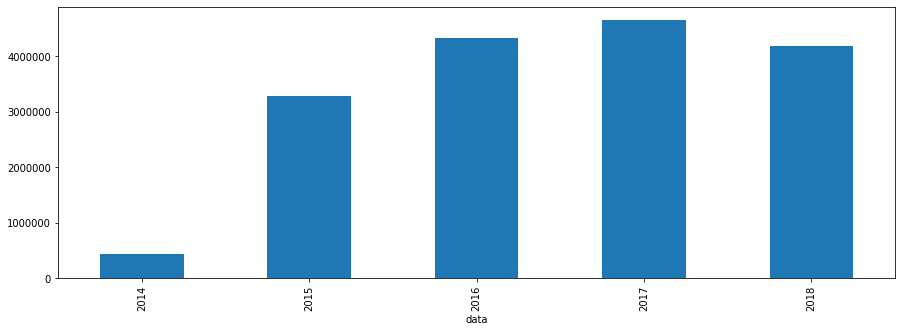

In [7]:
data['valor'].groupby(data['data'].dt.to_period('Y')).sum().plot(kind='bar', figsize=(15,5))

In [8]:
data["Year"] = data.data.apply(lambda x: x.year)
data["Month"] = data.data.apply(lambda x: x.strftime("%B"))
df = data.pivot_table(index="Month",columns="Year",values="valor", aggfunc="sum").fillna(0)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
pt = df.reindex(months)
pt.head(12)

Year,2014,2015,2016,2017,2018
Month,,,,,
January,0.00,80715.76,398732.38,469226.43,449808.06
February,0.00,72224.63,300369.98,360349.55,348243.37
March,0.00,73179.45,307800.64,417884.31,382666.09
April,0.00,263512.38,323850.44,428958.07,383273.38
May,0.00,325193.14,338480.67,355875.02,418669.53
June,0.00,333163.07,332429.23,340212.38,379383.08
July,1.50,402575.47,408854.16,407182.17,482195.78
August,54228.86,331405.31,303855.82,331542.19,434308.16
September,79707.74,294473.47,343189.30,330447.87,438753.21


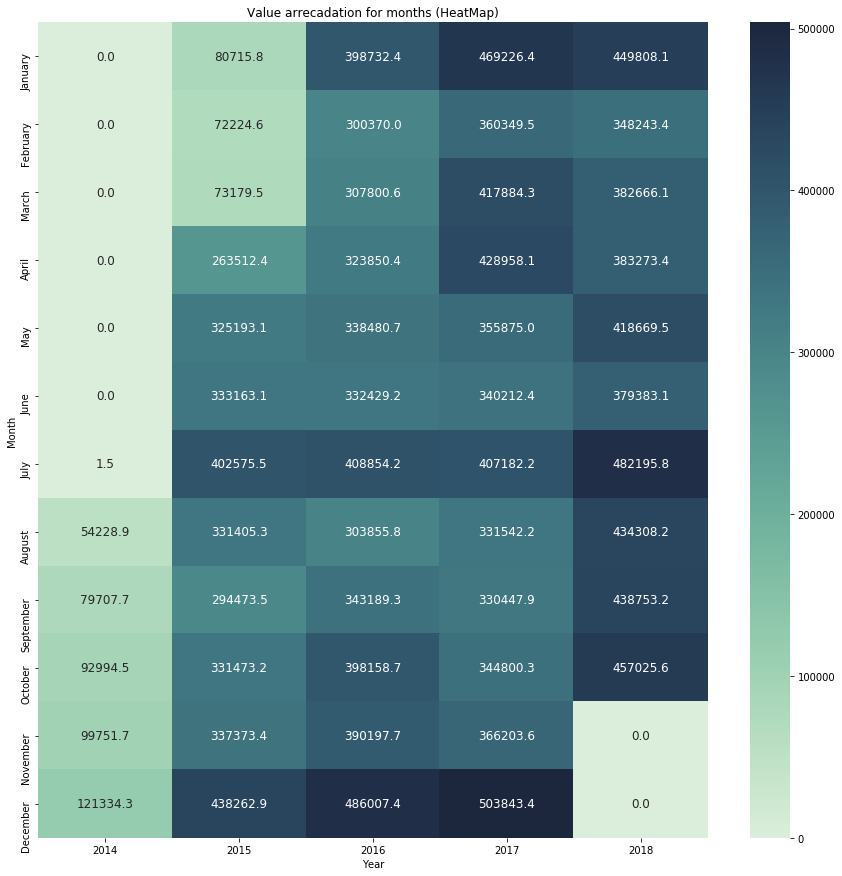

In [9]:
fig= plt.figure(figsize=(15,15), )
ax = plt.axes()
ax.set_title('Value arrecadation for months (HeatMap)')

cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True, light=.9)
cmap.set_under(".5")
sns.heatmap(pt, ax = ax, cmap=cmap, fmt='.1f', mask=pt.isnull(), annot=True, annot_kws={'size':12})

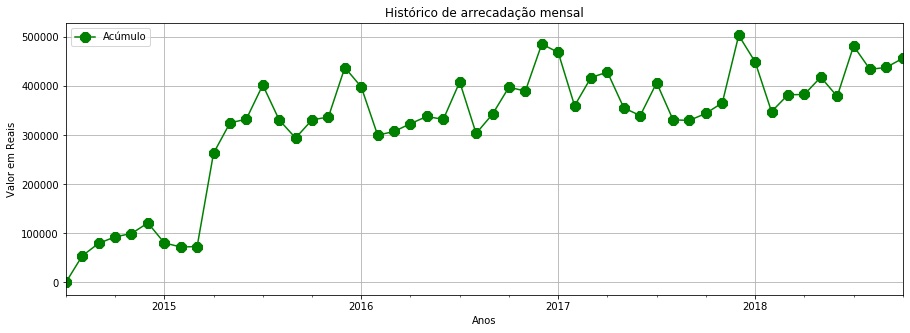

In [10]:
ax = data['valor'].groupby(data['data'].dt.to_period('M')).sum().plot(
    label = 'Acúmulo', marker = "8", markersize =10 ,figsize=(15,5), 
    color = "green", legend = True, title = "Histórico de arrecadação mensal")
ax.set_xlabel('Anos')
ax.set_ylabel('Valor em Reais')
ax.grid()

### Filtering by values with minus discrepancy

In [11]:
from datetime import date
data = data[data['data'] > pd.Timestamp(date(2015,3,31))]

In [12]:
data.head()

,data,valor,Year,Month
234,2015-04-01,2059.33,2015,April
235,2015-04-02,3497.39,2015,April
236,2015-04-03,4869.60,2015,April
237,2015-04-04,19071.83,2015,April
238,2015-04-05,13512.03,2015,April


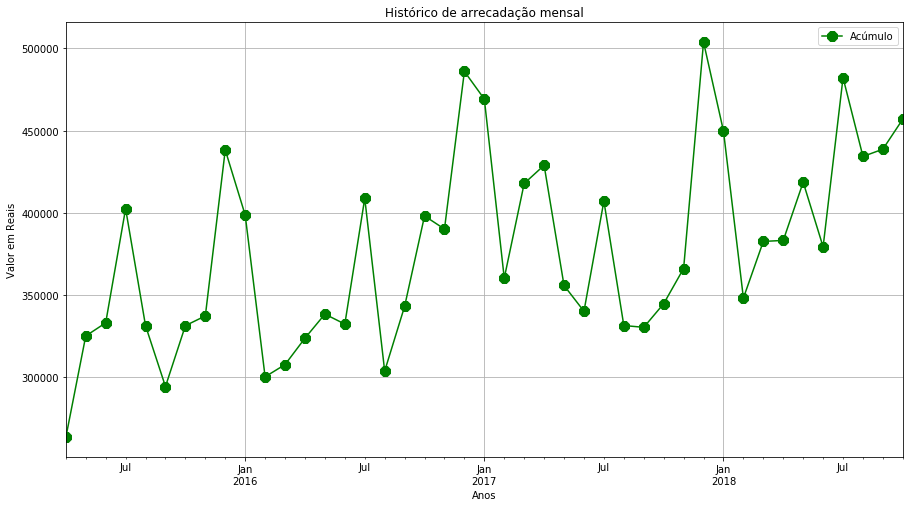

In [13]:
#data['valor'].groupby(data['data'].dt.to_period('M')).sum().plot(figsize=(20,5))
ax = data['valor'].groupby(data['data'].dt.to_period('M')).sum().plot(
    label = 'Acúmulo', marker = "8", markersize =10 ,figsize=(15,8), 
    color = "green", legend = True, title = "Histórico de arrecadação mensal")
ax.set_xlabel('Anos')
ax.set_ylabel('Valor em Reais')
ax.grid()

In [14]:
df = data.pivot_table(index="Month",columns="Year",values="valor", aggfunc="sum").fillna(0)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
pt = df.reindex(months)
pt.head(12)

Year,2015,2016,2017,2018
Month,,,,
January,0.00,398732.38,469226.43,449808.06
February,0.00,300369.98,360349.55,348243.37
March,0.00,307800.64,417884.31,382666.09
April,263512.38,323850.44,428958.07,383273.38
May,325193.14,338480.67,355875.02,418669.53
June,333163.07,332429.23,340212.38,379383.08
July,402575.47,408854.16,407182.17,482195.78
August,331405.31,303855.82,331542.19,434308.16
September,294473.47,343189.30,330447.87,438753.21


In [15]:
len(data)

1308

### Separate training and test

In [16]:
data_training = data.iloc[:1008, :]
data_test = data.iloc[1008:1308, :]

In [17]:
data_training = data_training[['valor']].values
data_test = data_test.iloc[:, 2:3].values

In [18]:
len(data_training),  len(data_test), data_training.shape

(1008, 300, (1008, 1))

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
data_train_scaled = scaler.fit_transform(np.array(data_training))

In [20]:
previsores = []
preco_real = []
for i in range(20, len(data_training)):
    previsores.append(data_train_scaled[i-20:i, 0])
    preco_real.append(data_train_scaled[i, 0])

In [21]:
previsores, preco_real = np.array(previsores), np.array(preco_real)

In [22]:
dt_values = pd.DataFrame(previsores)
dt_values[20] = pd.DataFrame(preco_real)
dt_values.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.045465,0.103626,0.159124,0.733525,0.508662,0.286674,0.271613,0.282072,0.281889,0.369900,...,0.556851,0.222724,0.176216,0.200701,0.231074,0.313089,0.596682,0.429633,0.239448,0.374890
1,0.103626,0.159124,0.733525,0.508662,0.286674,0.271613,0.282072,0.281889,0.369900,0.629880,...,0.222724,0.176216,0.200701,0.231074,0.313089,0.596682,0.429633,0.239448,0.374890,0.164307
2,0.159124,0.733525,0.508662,0.286674,0.271613,0.282072,0.281889,0.369900,0.629880,0.556851,...,0.176216,0.200701,0.231074,0.313089,0.596682,0.429633,0.239448,0.374890,0.164307,0.222792
3,0.733525,0.508662,0.286674,0.271613,0.282072,0.281889,0.369900,0.629880,0.556851,0.222724,...,0.200701,0.231074,0.313089,0.596682,0.429633,0.239448,0.374890,0.164307,0.222792,0.306156
4,0.508662,0.286674,0.271613,0.282072,0.281889,0.369900,0.629880,0.556851,0.222724,0.176216,...,0.231074,0.313089,0.596682,0.429633,0.239448,0.374890,0.164307,0.222792,0.306156,0.535516


In [23]:
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))
previsores.shape

(988, 20, 1)

### separating the data set according to tf.keras doc

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.grid'] = False

In [37]:
data = pd.read_csv('Datas/DataTreinamentoDevAcademy/data_2__.csv')
data = data.drop(['index'], axis=1)
#data_test = pd.read_csv('Datas/DataTreinamentoDevAcademy/data_1__test.csv', date_parser = 'data')
data.head()

,data,valor
0,2014-07-18,1.50
1,2014-08-05,83.20
2,2014-08-08,22.50
3,2014-08-11,15.91
4,2014-08-12,0.44


In [38]:
# data without the first 233 records (due to discrepancies)
data = data.iloc[234:, :]
data.head()

,data,valor
234,2015-04-01,2059.33
235,2015-04-02,3497.39
236,2015-04-03,4869.60
237,2015-04-04,19071.83
238,2015-04-05,13512.03


In [39]:
data_training = data.iloc[:1008, :]
data_test = data.iloc[1008:1308, :]

In [40]:
# Function responsible by adapt dataset for time series 
# setting history size each value and target size

def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)

        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
        
    return np.array(data), np.array(labels)

In [41]:
# setting 1200 samples for training and validation dataset and seed random
tf.random.set_seed(13)
TRAIN_SPLIT = 808

In [42]:
uni_data = data['valor']
uni_data.index = data['data']
uni_data.head()

data
2015-04-01     2059.33
2015-04-02     3497.39
2015-04-03     4869.60
2015-04-04    19071.83
2015-04-05    13512.03
Name: valor, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f75f5ffb198>],
      dtype=object)

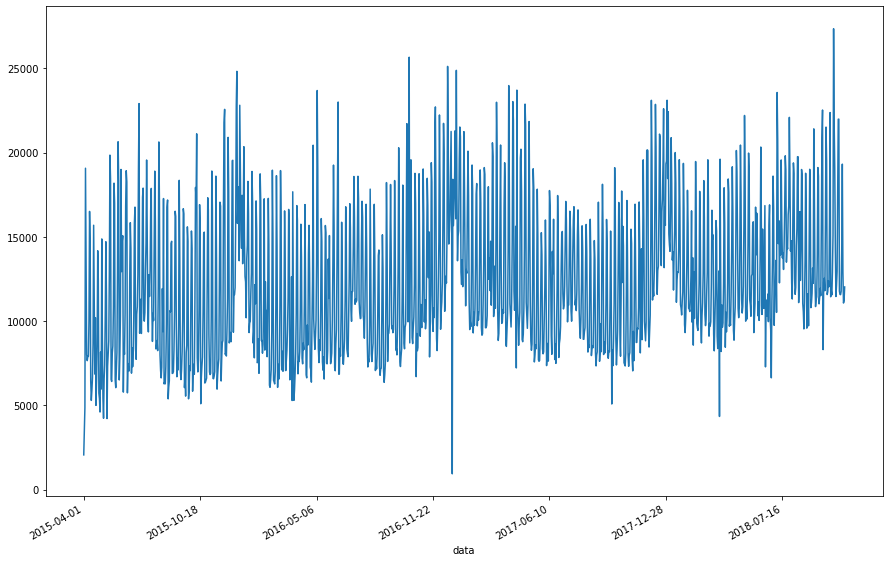

In [8]:
uni_data.plot(subplots=True)

In [43]:
uni_data = uni_data.values

In [44]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

In [45]:
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [46]:
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history, 
                                           univariate_future_target)

x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [47]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target temperature to predict')
print (y_train_uni[0])

Single window of past history
[[-2.17331808]
 [-1.85608611]
 [-1.55338047]
 [ 1.57959126]
 [ 0.35311512]
 [-0.85768318]
 [-0.93982915]
 [-0.88278272]
 [-0.88377982]
 [-0.40374273]
 [ 1.01428013]
 [ 0.61595224]
 [-1.20648701]
 [-1.46015611]
 [-1.32660879]
 [-1.16094252]
 [-0.71360455]
 [ 0.83320515]
 [-0.07793616]
 [-1.11526787]]

 Target temperature to predict
-0.3765232501151698


In [48]:
def create_time_steps(length):
    return list(range(-length, 0))

In [49]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['8-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=15,
                   label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
        plt.legend()
        plt.xlim([time_steps[0], (future+5)*2])
        plt.xlabel('Time-Step')
    return plt

<module 'matplotlib.pyplot' from '/home/personal-arthur/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

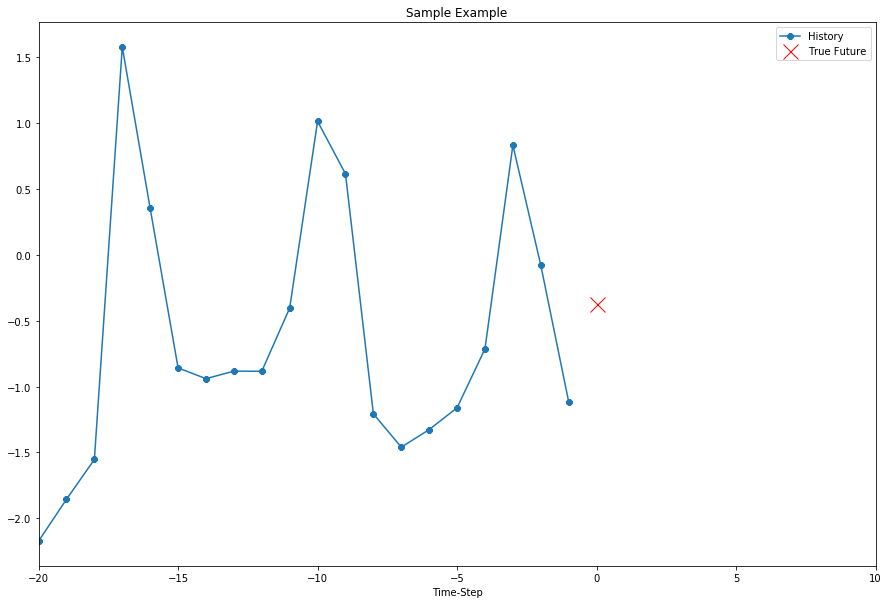

In [50]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [16]:
def baseline(history):
    return np.mean(history)

<module 'matplotlib.pyplot' from '/home/personal-arthur/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

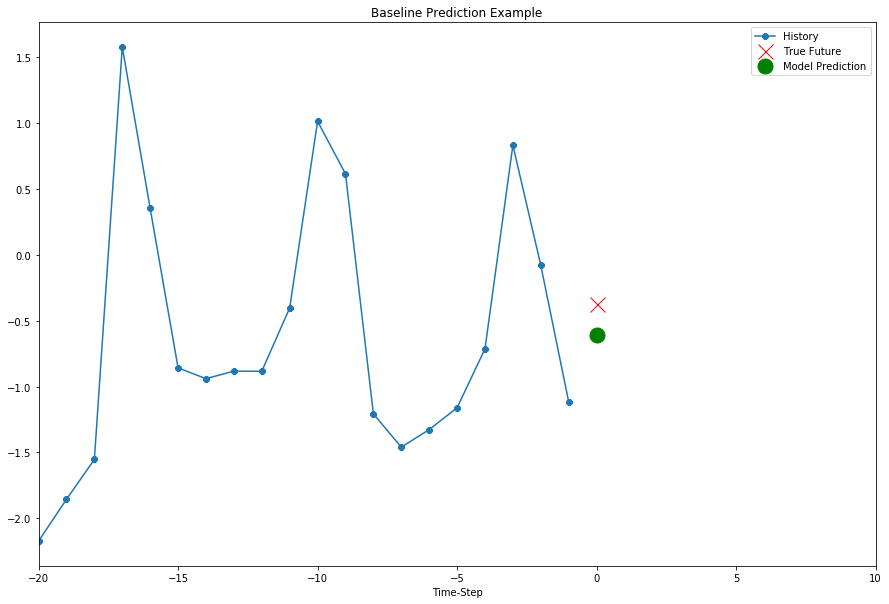

In [51]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

In [89]:
BATCH_SIZE = 8
BUFFER_SIZE = 80

In [90]:
train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [104]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape = x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dropout(.05),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mse', 
                          metrics = ['RootMeanSquaredError'])

In [112]:
EVALUATION_INTERVAL = 100
EPOCHS = 20

single_step_history = simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Train for 100 steps, validate for 50 steps
Epoch 1/20
100/100 [==============================] - 1s 8ms/step - loss: 0.2357 - RootMeanSquaredError: 0.4839 - val_loss: 0.1811 - val_RootMeanSquaredError: 0.4256
Epoch 2/20
100/100 [==============================] - 1s 9ms/step - loss: 0.2409 - RootMeanSquaredError: 0.4918 - val_loss: 0.1806 - val_RootMeanSquaredError: 0.4250
Epoch 3/20
100/100 [==============================] - 1s 8ms/step - loss: 0.2284 - RootMeanSquaredError: 0.4774 - val_loss: 0.1812 - val_RootMeanSquaredError: 0.4257
Epoch 4/20
100/100 [==============================] - 1s 9ms/step - loss: 0.2424 - RootMeanSquaredError: 0.4930 - val_loss: 0.1833 - val_RootMeanSquaredError: 0.4282
Epoch 5/20
100/100 [==============================] - 1s 8ms/step - loss: 0.2362 - RootMeanSquaredError: 0.4859 - val_loss: 0.1815 - val_RootMeanSquaredError: 0.4260
Epoch 6/20
100/100 [==============================] - 1s 9ms/step - loss: 0.2443 - RootMeanSquaredError: 0.4950 - val_loss: 0.1

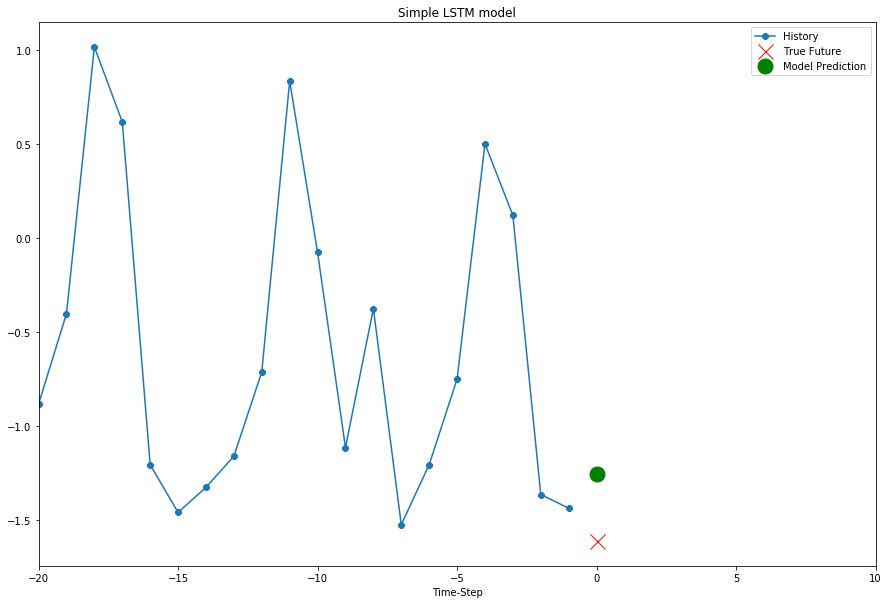

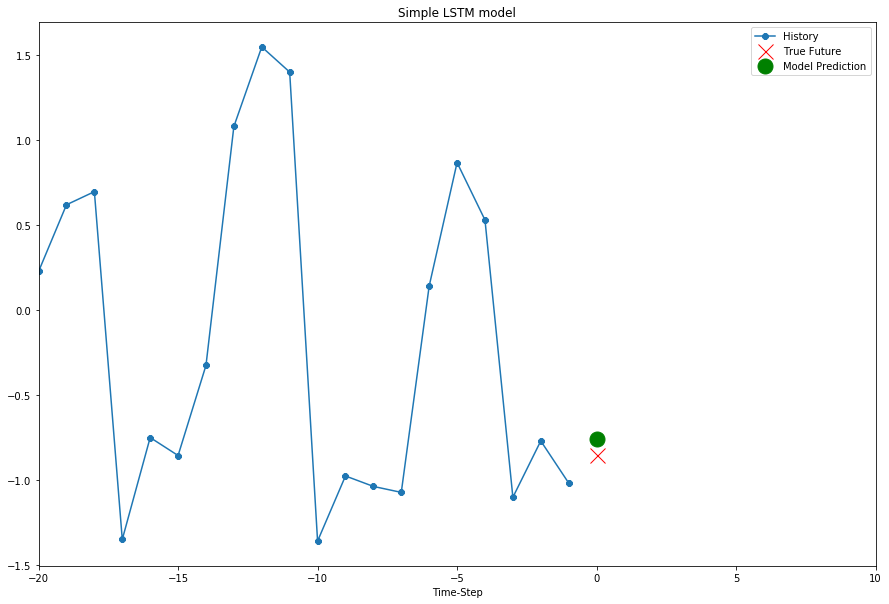

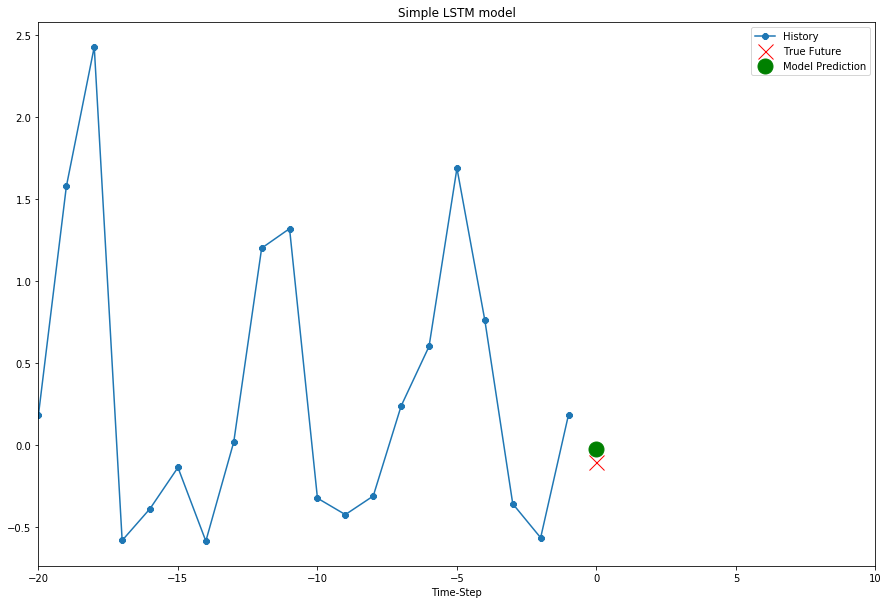

In [114]:
for x, y in train_univariate.take(3):
    plot = show_plot([x[0].numpy(), y[0].numpy(),
                simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
    plot.show()

In [110]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

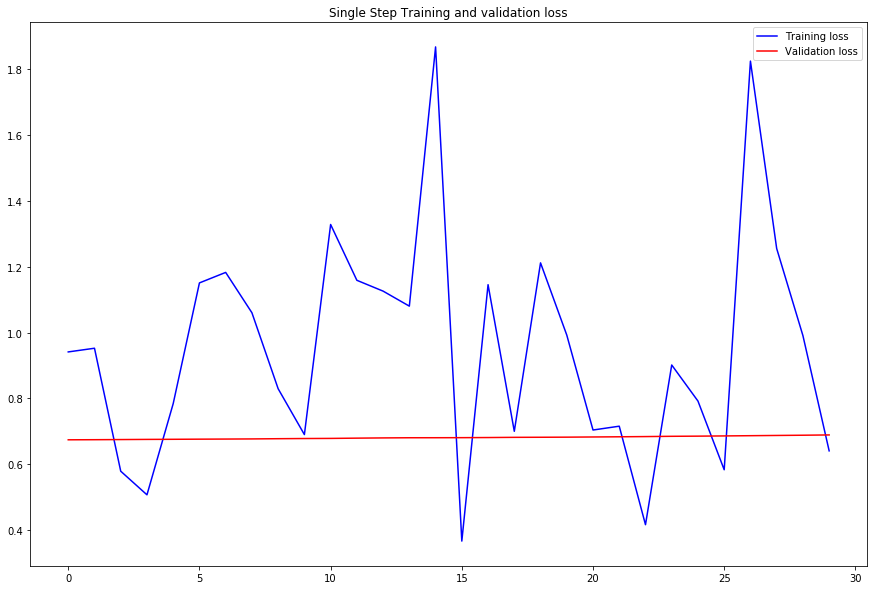

In [111]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

#### use this docmentation https://www.tensorflow.org/tutorials/structured_data/time_series